Silhouette, random = 0: 0.11362027575179429
Purity, random = 0: 0.7671957671957672
Silhouette, random = 1: 0.11403554201377072
Purity, random = 1: 0.7632275132275133
Silhouette, random = 2: 0.11362027575179429
Purity, random = 2: 0.7671957671957672


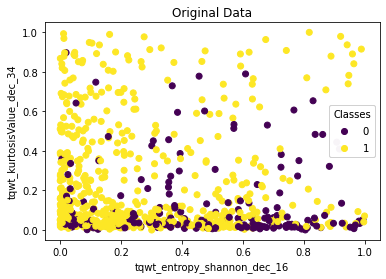

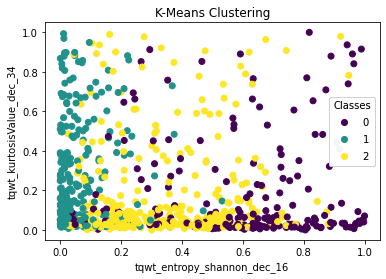

for a variability of 80.06422402169659%, at least 31 principal components are necessary


In [10]:
"""Recall the pd_speech.arff dataset from earlier homeworks, centered on the Parkinson diagnosis from
speech features. For the following exercises, normalize the data using sklearn’s MinMaxScaler.
Using sklearn, apply k-means clustering fully unsupervisedly (without targets) on the
normalized data with 𝑘 = 3 and three different seeds (using random ϵ {0,1,2}). Assess the
silhouette and purity of the produced solutions.
Using a scatter plot, visualize side-by-side the labeled data using as labels: i) the original
Parkinson diagnoses, and ii) the previously learned 𝑘 = 3 clusters (random= 0). To this end, select
the two most informative features as axes and color observations according to their label. For feature
selection, select the two input variables with highest variance on the MinMax normalized data.
The fraction of variance explained by a principal component is the ratio between the
variance of that component (i.e., its eigenvalue) and total variance (i.e., sum of all eigenvalues).
How many principal components are necessary to explain more than 80% of variability?"""


from sklearn.preprocessing import MinMaxScaler
import random
from sklearn import cluster, metrics
import pandas as pd
from scipy.io.arff import loadarff
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

data = loadarff('pd_speech.arff')
df = pd.DataFrame(data[0])
X = df.drop('class', axis=1)
y = df['class']

colnames = list(X.columns)

X = MinMaxScaler().fit_transform(X)

def purity_score(y, y_pred):
    confusion_matrix = metrics.cluster.contingency_matrix(y, y_pred)
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix) 

for num in range(3):
    kmeans_model = cluster.KMeans(n_clusters=3, random_state=num).fit(X)
    y_pred = kmeans_model.labels_

    print("Silhouette, random = {}: {}".format(num, metrics.silhouette_score(X, y_pred)))
    print("Purity, random = {}: {}".format(num, purity_score(y, y_pred)))

selection = VarianceThreshold().fit(X).variances_
sorted_selection = sorted(selection)

var1 = sorted_selection[-1]
var2 = sorted_selection[-2]
col1 = list(selection).index(var1)
col2 = list(selection).index(var2)

colname1 = colnames[col1]
colname2 = colnames[col2]

kmeans = cluster.KMeans(n_clusters=3, random_state=0).fit(X)
y_pred = kmeans.labels_

fig,ax = plt.subplots()
scatter=ax.scatter(X[:,col1], X[:,col2], c=y)
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)
plt.xlabel(colname1)
plt.ylabel(colname2)
plt.title("Original Data")
plt.show()

fig,ax = plt.subplots()
scatter=ax.scatter(X[:,col1], X[:,col2], c=y_pred)
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)
plt.xlabel(colname1)
plt.ylabel(colname2)
plt.title("K-Means Clustering")
plt.show()

n = 31
pca = PCA(n_components=n, svd_solver='full')
pca.fit(X)
sum = 0
x = pca.explained_variance_ratio_
for i in x:
    sum += i
print("for a variability of {}%, at least {} principal components are necessary".format(sum*100, n))